{'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
{'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}


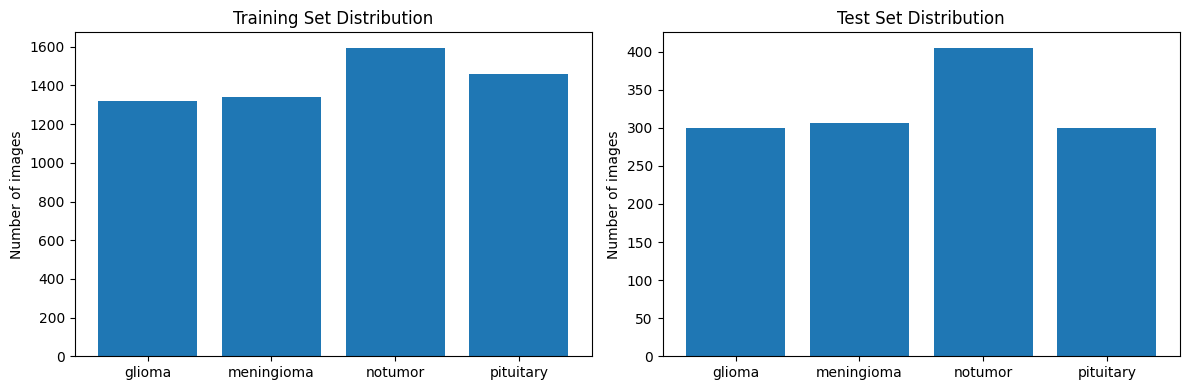

1.2074186222558667


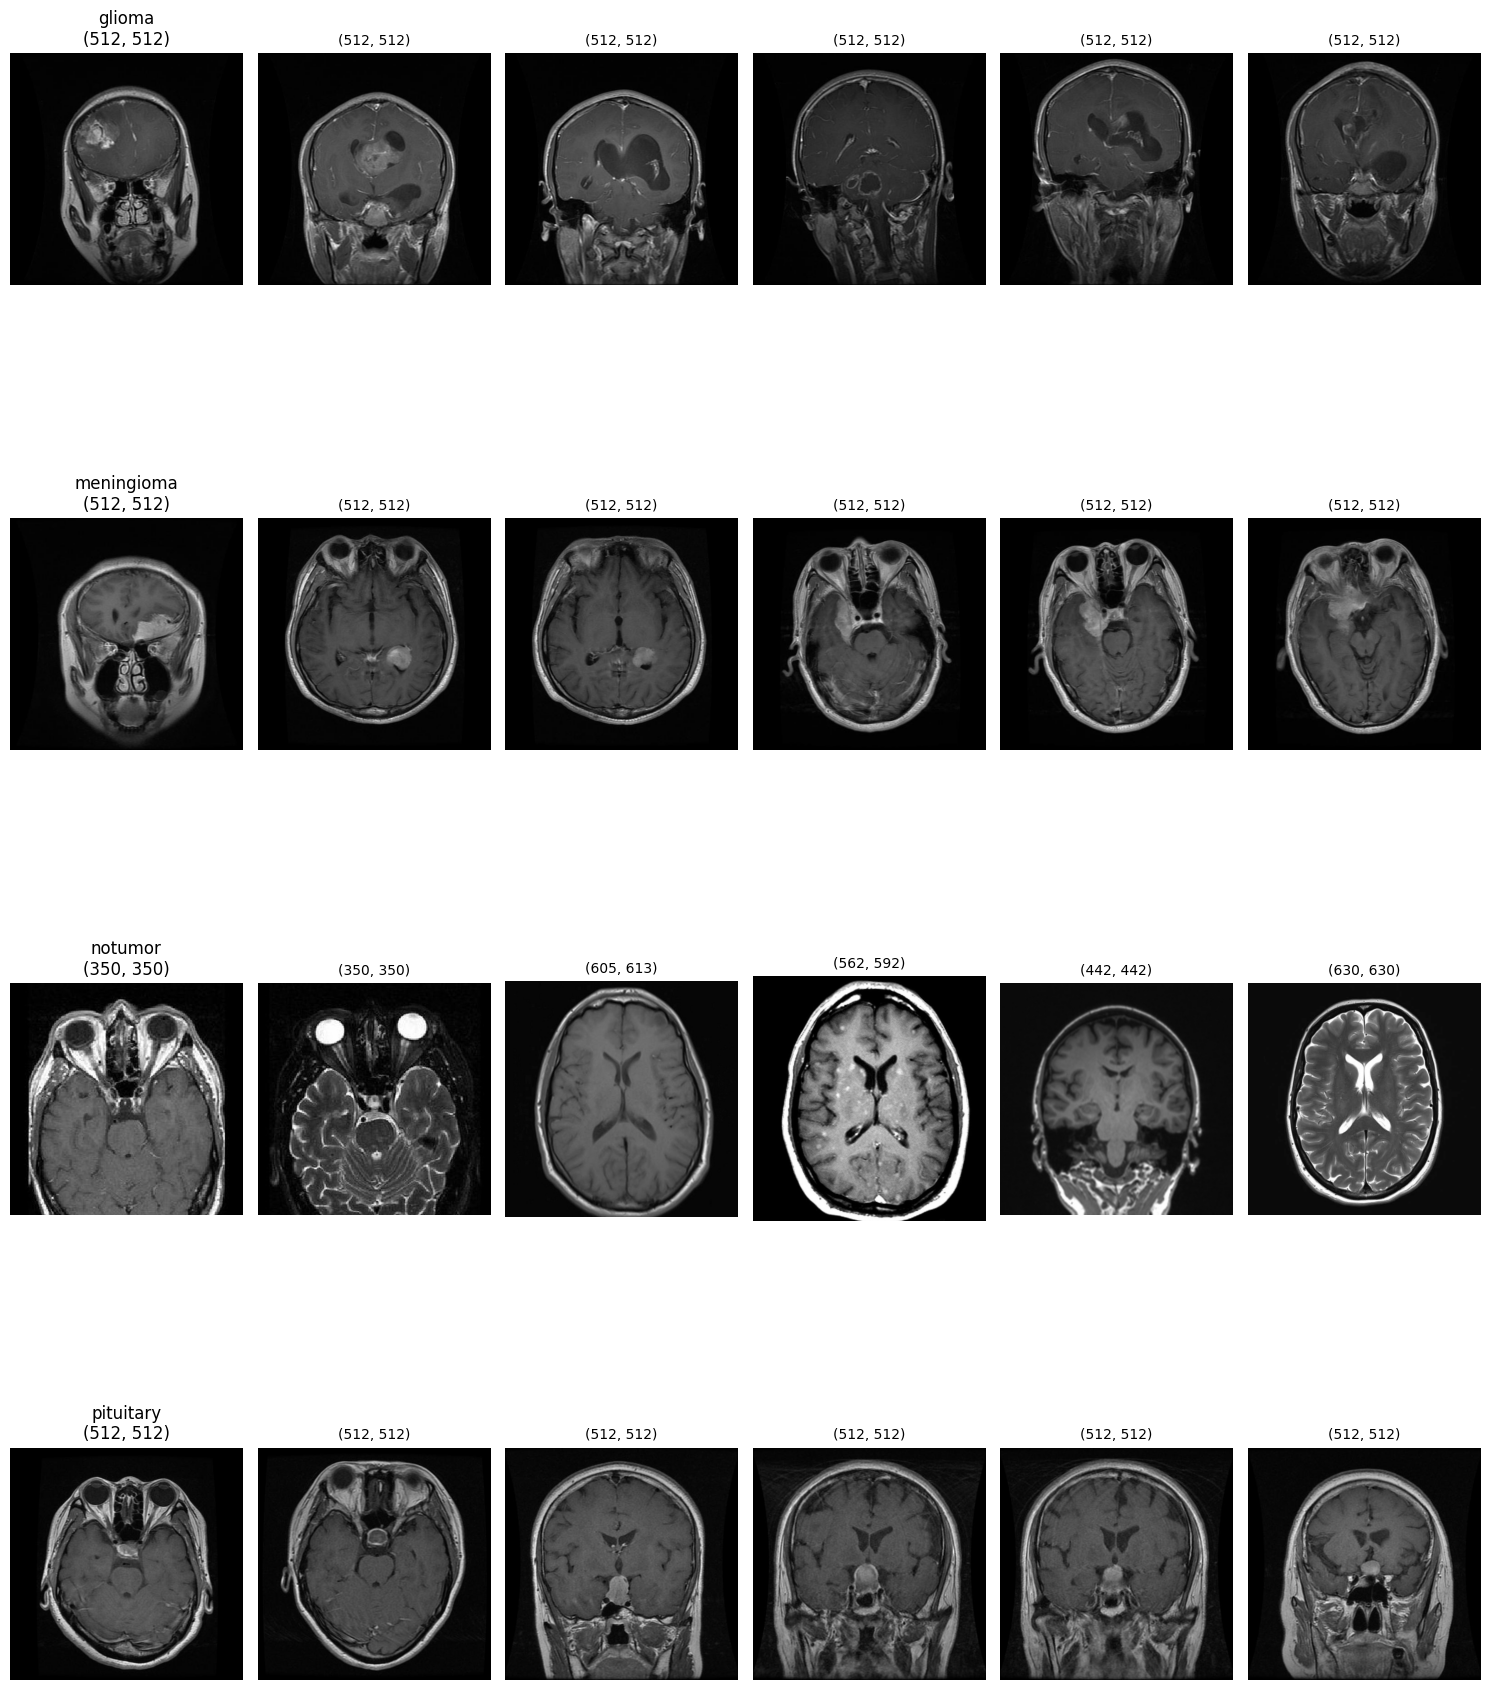

Width range: 201 - 1365
Height range: 198 - 1365
Most common size: [((512, 512), 286)]
Average aspect ratio: 0.99


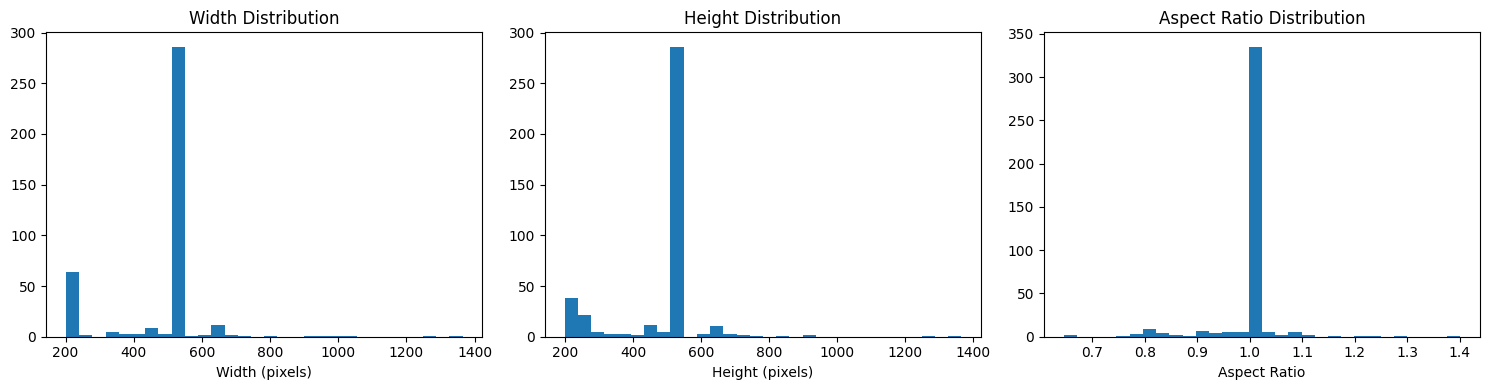

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

DATA_DIRECTORY = '../data/raw/'
TRAIN_DIRECTORY = os.path.join(DATA_DIRECTORY, 'Training')
TEST_DIRECTORY = os.path.join(DATA_DIRECTORY, 'Testing')

def count_image(directory):
    counts = {}
    for name in os.listdir(directory):
        path = os.path.join(directory, name)
        if os.path.isdir(path):
            counts[name] = len(os.listdir(path))
    return counts

train_count = count_image(TRAIN_DIRECTORY)
testing_count = count_image(TEST_DIRECTORY)

print(train_count)
print(testing_count)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
ax1.bar(train_count.keys(),train_count.values())
ax1.set_title('Training Set Distribution')
ax1.set_ylabel('Number of images')

ax2.bar(testing_count.keys(), testing_count.values())
ax2.set_title('Test Set Distribution')
ax2.set_ylabel('Number of images')

plt.tight_layout()
plt.show()

imbalance_ratio = max(train_count.values()) / min(train_count.values())
print(imbalance_ratio)

def sample_images(directory, n):
    classes = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    fig, axes = plt.subplots(len(classes), n, figsize=(15, 5*len(classes)))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(directory, class_name)
        images = os.listdir(class_path)[:n]

        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)

            axes[i, j].imshow(img, cmap='gray')
            axes[i,j].axis('off')
            if j == 0:
                axes[i,j].set_title(f'{class_name}\n{img.size}',fontsize = 12)
            else:
                axes[i,j].set_title(f'{img.size}', fontsize=10)

    plt.tight_layout()
    plt.show()

sample_images(TRAIN_DIRECTORY, 6)

def analyze_images(directory):
    size = []
    aspect = []

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path)[:100]:
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path)
                size.append(img.size)
                aspect.append(img.size[0] / img.size[1])
            except:
                continue

    widths = [s[0] for s in size]
    heights = [s[1] for s in size]

    print(f"Width range: {min(widths)} - {max(widths)}")
    print(f"Height range: {min(heights)} - {max(heights)}")
    print(f"Most common size: {Counter(size).most_common(1)}")
    print(f"Average aspect ratio: {np.mean(aspect):.2f}")

    fig, axes = plt.subplots(1,3,figsize=(15,4))
    axes[0].hist(widths, bins=30)
    axes[0].set_title('Width Distribution')
    axes[0].set_xlabel('Width (pixels)')
        
    axes[1].hist(heights, bins=30)
    axes[1].set_title('Height Distribution')
    axes[1].set_xlabel('Height (pixels)')
        
    axes[2].hist(aspect, bins=30)
    axes[2].set_title('Aspect Ratio Distribution')
    axes[2].set_xlabel('Aspect Ratio')
        
    plt.tight_layout()
    plt.show()

analyze_images(TRAIN_DIRECTORY)